In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
sns.set(font='Arial')

from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.seasonal import STL
plt.rc("figure", figsize=(16, 10))

In [57]:
vac_rate = pd.read_excel('..\\data\\pareto\\rental\\rental_forecast.xlsx',index_col=0,sheet_name='vac_hmi',engine='openpyxl')
vac_rate.index = pd.PeriodIndex(vac_rate.index,freq='A').to_timestamp()

In [58]:
vac_rate=vac_rate/100

In [59]:
universe = pd.read_excel('..\\data\\pareto\\rental\\rental_forecast.xlsx',index_col=0,sheet_name='universe',engine='openpyxl')
universe.index = pd.PeriodIndex(universe.index,freq='A').to_timestamp()

In [60]:
rents = pd.read_excel('..\\data\\pareto\\rental\\rental_forecast.xlsx',index_col=0,sheet_name='rents',engine='openpyxl')
rents.index = pd.PeriodIndex(rents.index,freq='A').to_timestamp()


In [61]:
rents=rents.join(rents.pct_change(1),rsuffix = '_pct_diff')

In [62]:
universe['Vacant Units']=universe['TOTAL']*vac_rate['all_TOTAL']

In [63]:
universe['occupied_units'] = universe['TOTAL']-universe['Vacant Units']

In [64]:
universe['change_in_occupied']=universe['occupied_units'].diff(1)

In [65]:
nat_var = pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='national',engine='openpyxl',index_col=0)
prov_var=pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='provincial',engine='openpyxl',index_col=0)
covid = pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='covid_dummy',engine='openpyxl',index_col=0)
wti = pd.read_excel('../data/hmo_2023_variables.xlsx',sheet_name='wti',engine='openpyxl',index_col=0)


nat_var.index = nat_var.index.str.replace(' ','')
nat_var.index = nat_var.index.rename('Date')
nat_var.index = pd.PeriodIndex(nat_var.index,freq='Q').to_timestamp()

prov_var.index = prov_var.index.rename('Date')
prov_var.index = pd.PeriodIndex(prov_var.index,freq='Q').to_timestamp()


covid.index = covid.index.str.replace(' ','')
covid.index = covid.index.rename('Date')
covid.index = pd.PeriodIndex(covid.index,freq='Q').to_timestamp()

wti.index=wti.index.str.replace(' ','')
wti.index = wti.index.rename('Date')
wti.index = pd.PeriodIndex(wti.index,freq='Q').to_timestamp()

In [66]:
prov_var = prov_var.join(nat_var)
prov_var = prov_var.join(covid)
prov_var = prov_var.join(wti)

In [67]:
prov_var=prov_var.resample('A').mean()

In [42]:
multi_starts = pd.read_csv('..\\data\\pareto\\acasmmura_q.csv',index_col=0)
multi_starts.index=multi_starts.index.rename('Date')
multi_starts.index=pd.DatetimeIndex(multi_starts.index,freq='QS-OCT')

In [43]:
multi_fcast = pd.read_csv('multi_starts_fcast_23.csv',index_col=0)
multi_fcast.index=pd.DatetimeIndex(multi_fcast.index,freq='QS-OCT')
multi_fcast.columns=["ACASMMURA_Q"]

In [44]:
multi_starts = multi_starts*1000
multi_starts = multi_starts.append(multi_fcast['2023':])

In [46]:
multi_starts = multi_starts['1990':].resample('A').mean()

In [47]:
multi_starts

,ACASMMURA_Q
1990-12-31,1467.000000
1991-12-31,566.000000
1992-12-31,1038.750000
1993-12-31,1456.750000
1994-12-31,1649.750000
1995-12-31,1300.750000
1996-12-31,1211.250000
1997-12-31,2532.500000
1998-12-31,3316.500000
1999-12-31,4040.000000


AttributeError: 'PathCollection' object has no property 'type'

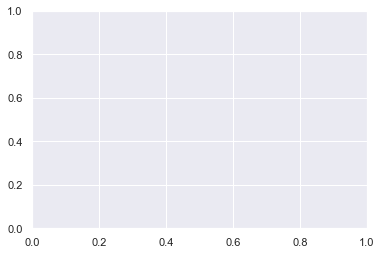

In [68]:
plt.scatter(x=multi_starts['1991':'2022'].values,y=universe['Change in Universe']['1991':],type='scatter')

In [69]:
universe

,BACHELOR,1 BEDROOM,2 BEDROOM,3 BEDROOM +,TOTAL,Change in Universe,Rental Completions,Vacant Units,occupied_units,change_in_occupied
1990-01-01,1904,22500,25356,5500,55260,NaN,291,1160.460,54099.540,NaN
1991-01-01,1905,22312,24978,5324,54519,-741.0,256,1962.684,52556.316,-1543.224
1992-01-01,2285,22877,25202,6041,56405,1886.0,138,3102.275,53302.725,746.409
1993-01-01,2307,22698,24374,5568,54947,-1458.0,168,3241.873,51705.127,-1597.598
1994-01-01,2420,23354,26410,5813,57997,3050.0,132,2957.847,55039.153,3334.026
1995-01-01,2378,22747,24449,5428,55002,-2995.0,83,1980.072,53021.928,-2017.225
1996-01-01,2361,22963,23744,5508,54576,-426.0,6,818.640,53757.360,735.432
1997-01-01,2380,22776,23420,5163,53739,-837.0,28,268.695,53470.305,-287.055
1998-01-01,2335,22254,22812,5123,52524,-1215.0,130,315.144,52208.856,-1261.449
1999-01-01,2310,22169,22539,4751,51769,-755.0,267,1397.763,50371.237,-1837.619
